<a href="https://colab.research.google.com/github/KISHANJB/Sign-Language-Recognition/blob/main/5ISLsoft64max515.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import imghdr
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten , BatchNormalization

In [ ]:
train_dir=r'/content/drive/MyDrive/500'


In [ ]:
data_train=tf.keras.utils.image_dataset_from_directory(train_dir,batch_size=32,image_size=(64, 64))


NameError: ignored

In [ ]:
data_iterator=data_train.as_numpy_iterator()
batch=data_iterator.next()
len(batch)

2

In [ ]:
batch[0].shape

(32, 64, 64, 3)

In [ ]:
batch[0][0].shape

(64, 64, 3)

In [ ]:
print(batch[0].min())
print(batch[0].max())

0.0
255.0


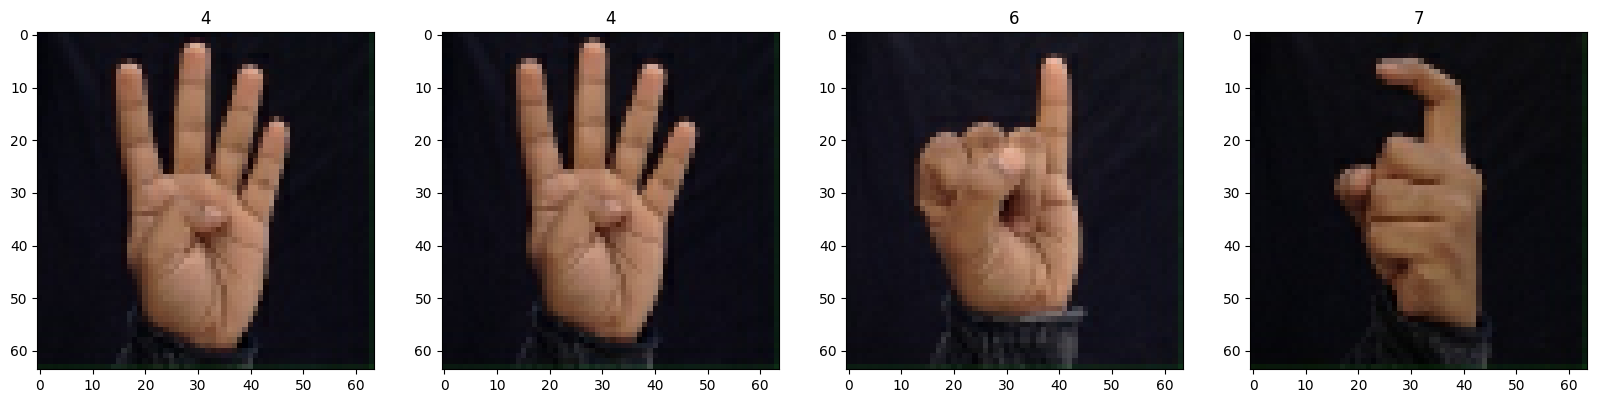

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data_train.map(lambda x,y: (x/255, y))


In [ ]:
print(data.as_numpy_iterator().next()[0].min())
print(data.as_numpy_iterator().next()[0].max())
scaled=data.as_numpy_iterator().next()


0.0
1.0


In [ ]:
scaled[0].shape

(32, 64, 64, 3)

In [ ]:
scaled[1].shape

(32,)

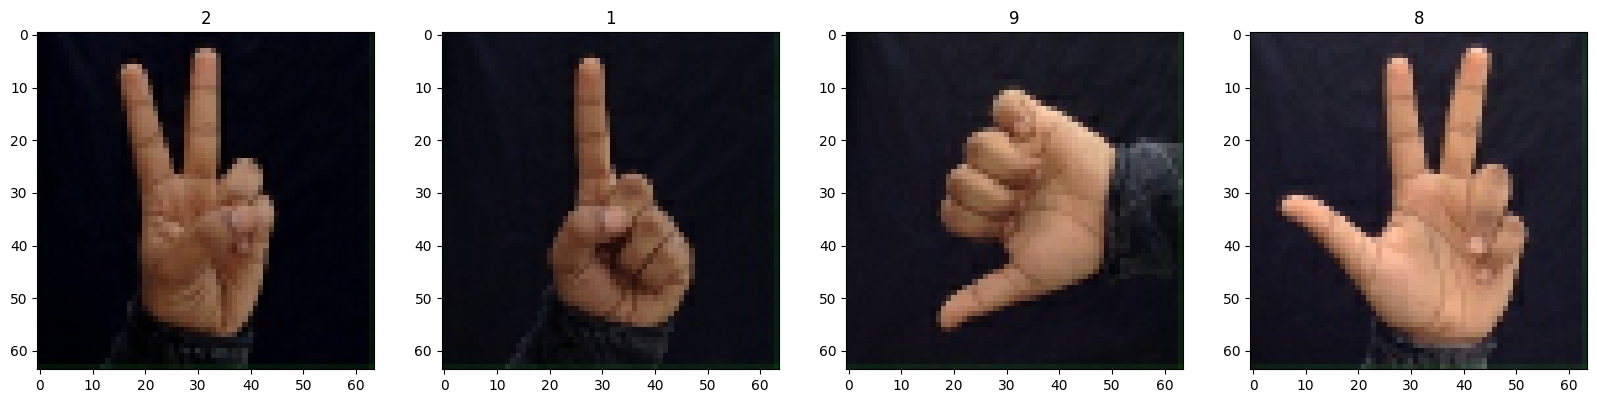

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(scaled[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(scaled[1][idx])

In [ ]:
len(data_train)

162

In [ ]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)
len(data)

162

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD

In [ ]:
weight_decay = 1e-4
model = Sequential([
                    Conv2D(64, (5, 5), activation='relu', padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=(64, 64, 3)),
                    BatchNormalization(),
                    Conv2D(64, (5, 5), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.2),
                    Conv2D(32, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    Conv2D(32, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.3),
                    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.3),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
])

opt =    tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                        

In [ ]:
print(scaled[0].shape)
print(scaled[0][1].shape)

(32, 64, 64, 3)
(64, 64, 3)


In [ ]:
logdir='ISLlogs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
#r = model.fit(datagen.flow(x_train , y_train , batch_size = 32), epochs = 20, validation_data =val , verbose = 1)
hist = model.fit(train,epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
113/113 [==============================] - 566s 5s/step - loss: 0.4111 - accuracy: 0.9334 - val_loss: 9.1740 - val_accuracy: 0.3232
Epoch 2/5
113/113 [==============================] - 439s 4s/step - loss: 0.0459 - accuracy: 1.0000 - val_loss: 0.0463 - val_accuracy: 1.0000
Epoch 3/5
113/113 [==============================] - 453s 4s/step - loss: 0.0458 - accuracy: 1.0000 - val_loss: 0.0459 - val_accuracy: 1.0000
Epoch 4/5
113/113 [==============================] - 452s 4s/step - loss: 0.0455 - accuracy: 1.0000 - val_loss: 0.0454 - val_accuracy: 1.0000
Epoch 5/5
113/113 [==============================] - 454s 4s/step - loss: 0.0453 - accuracy: 1.0000 - val_loss: 0.0452 - val_accuracy: 1.0000


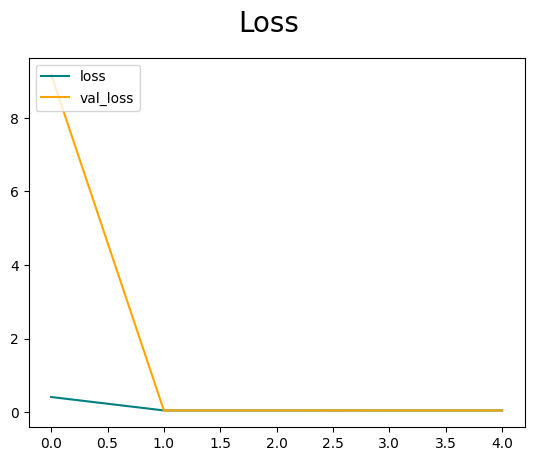

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

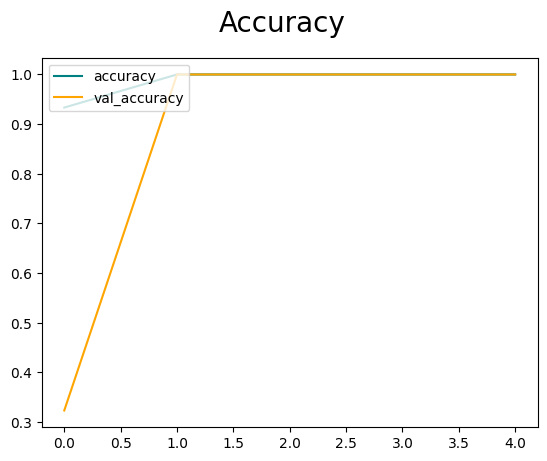

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','5ISLsoft64max515.h5'))
#new_model = load_model('ISLclassifier.h5')
#new_model = load_model('ISLclassifier.h5')